# Linear regression

This homework assignment will be entirely related to linear regression and its implementation.

In [1]:
#import libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

#### Write a linear regression hypothesis function in vector form

Лінійна функція представляється у вигляді наступного рівняння: $$y=kx+b$$
де x - ознака (feature), y - цільове значення, k - коєфіцієнт нахилу прямої, а b - точка на осі y, через яку проходить графік функції при x = 0.
k та b взагалі - це ваги для ознак.
У DataScience ознак для кожного цільового значення може бути декілька, тому для кожного feature приймаються ваги:
$$h(\vec{x}) = w_0 + w_1 * x_1 + w_2 * x_2 + ...+ w_n *x_n$$

Ціль навчання моделі - знайти такі коефіцієнти (ваги)
$$w_0, w_1, w_n$$, щоб значення  $$h(x_{(i)})$$ були якомога ближчі до значення $$y_{(i)}$$

Лінійна регрессія у векторному вигляді описується наступною формулою
 $$h(\vec{x}) = \vec{w} * \vec{x}$$

In [2]:
def h(X, w):
    return np.dot(X, w)

In [3]:
# Generate some random data
np.random.seed(0)
X = np.random.rand(100, 3)  # 100 samples with 3 features
w = np.random.rand(3)  # Parameters (weights) of the model

# Calculate predictions
predictions = h(X, w)

print("Predictions:", predictions)


Predictions: [1.25192802 1.03707221 1.40801118 1.13664245 1.25508485 0.37202081
 1.70489482 1.34171797 0.65030894 1.39847272 0.99109214 0.73562339
 1.34683996 1.04197915 0.90118886 0.81376768 0.75744095 1.19666048
 0.53179945 0.67199871 0.44820335 0.40027357 1.09859419 0.99907326
 1.59994927 0.29447479 0.46630295 0.65589932 0.89339724 0.84056266
 0.84931548 0.93443369 0.82342807 0.61887064 1.49414456 1.17123003
 1.08866636 1.40783618 1.33820236 1.44017457 1.36404668 1.11391369
 0.4707665  0.88418686 0.54358044 1.19782456 1.22378625 0.96773526
 1.30909278 1.71917963 0.86158758 0.93639127 1.30804149 0.75364215
 1.65019466 0.90482543 0.96820727 0.21023762 1.00791156 1.39721427
 0.822659   1.14332868 1.18543572 0.66094583 1.14616098 0.70539545
 0.49273897 0.98350592 0.30076344 1.12536077 1.28658704 0.50735137
 0.78292751 1.5309726  0.92755077 1.46770232 1.50916043 0.60304044
 0.64146271 0.83063897 1.04647061 0.80655576 0.7027084  1.03101154
 1.57438075 0.69776554 1.17841567 0.41330752 1.30

#### Create a function to calculate the loss function in vector form

Функція втрат/помилок (loss/error/cost function) - це функція, яка вимірює рівень помилок алгоритму машинного навчання, який навчається на тренувальних даних. Завдяки їй оцінюється наскільки сильно модель помиляється

Функція втрат у математичному вигляді представлена наступною формулою:
$$J(\vec{w}) = (1/2*n)\sum_{i=1}^n(h(x^i)- y^i)^2$$
де:
n – кількість спостережень,
X - матриця вхідних змінних,
w - вектор параметрів моделі (ваги),
y - вектор фактичних значень

In [4]:
def loss_function(X, y, w):
    m = X.shape[0]
    return np.square(h(X, w) - y).sum()/(2*m)

np.random.seed(0)
X = np.random.rand(100, 3)  # 100 samples with 3 features
y = np.random.rand(100)  # Target variable
w = np.random.rand(3)  # Parameters (weights) of the model

# Calculate the loss
loss = loss_function(X, y, w)

print("Loss:", loss)

Loss: 0.10788797459582472


#### Implement one step of gradient descent

Градієнтний спуск (Gradient Descent) - це алгоритм оптимізації, який використовується для знаходження мінімуму функції шляхом ітеративного зменшення значення функції в напрямку найшвидшого спаду її значення.

Градієнтний спуск використовується для оптимізації параметрів $$(w_0, w_1, ...)$$ моделі шляхом мінімізації функції втрат (cost function). Ідея полягає у тому, щоб визначити напрямок найшвидшого зменшення функції втрат і змінювати параметри моделі в цьому напрямку. Цей процес повторюється доти, поки значення функції втрат не стане достатньо малим або досягне заданого ліміту ітерацій.

У математичному вигляді градіентний спуск записується наступною формулою:
$$h(\vec{w}) = \vec{w}^{prev} - \alpha∇J(\vec{w})$$

In [5]:
def gradient_descent_step(X, y, w, learning_rate):
    m = X.shape[0]
    predictions = h(X, w) # calculate predictions
    error = predictions - y # calculate error
    gradient = (1 / m) * np.dot(X.T, error)
    w = w - learning_rate * gradient
    return w

# Generate some random data
np.random.seed(0)
X = np.random.rand(100, 3)  # 100 samples with 3 features
y = np.random.rand(100)  # Target variable
w = np.random.rand(3)  # Parameters (weights) of the model
learning_rate = 0.1

# Calculate the initial loss
initial_loss = loss_function(X, y, w)
print("w:", w)
print("Initial loss:", initial_loss)
print('-'*50)

# Perform one step of gradient descent
w = gradient_descent_step(X, y, w, learning_rate)

# Calculate the updated loss
print("New w:", w)
updated_loss = loss_function(X, y, w)
print("Updated loss:", updated_loss)

w: [0.4012595  0.92929142 0.09961493]
Initial loss: 0.10788797459582472
--------------------------------------------------
New w: [0.38516054 0.91090948 0.08611795]
Updated loss: 0.10041927167559753


#### Obtaining the optimal values of the w

In [6]:
def gradient_descent(X, y, w, learning_rate, n_iter):
    losses = loss_function(X, y, w)
    losses_history = [losses]
    for i in range(n_iter):
        w = gradient_descent_step(X, y, w, learning_rate)
        losses = loss_function(X, y, w)
        losses_history.append(losses)
    return w, losses_history

w_opt, losses = gradient_descent(X, y, w, learning_rate, 100)

print("Optimal w:", w_opt)
print("Loss", losses[-1])

Optimal w: [0.20541181 0.54116143 0.10559992]
Loss 0.054311011263837576


#### Find the best parameters w for the [dataset]('https://drive.google.com/file/d/1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo/view?usp=share_link') to predict the price of a house depending on the area, number of bathrooms, and number of bedrooms

In [7]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
scaler = MinMaxScaler()

columns = ['area', 'bedrooms', 'bathrooms', 'price']
data = scaler.fit_transform(df[columns])
norm_df = pd.DataFrame(data, columns=columns)

norm_df.head()

,area,bedrooms,bathrooms,price
0,0.396564,0.6,0.333333,1.000000
1,0.502405,0.6,1.000000,0.909091
2,0.571134,0.4,0.333333,0.909091
3,0.402062,0.6,0.333333,0.906061
4,0.396564,0.6,0.000000,0.836364


In [9]:
X = np.array(norm_df[['area', 'bedrooms', 'bathrooms']])
y = np.array(norm_df['price'])
X.shape, y.shape

((545, 3), (545,))

In [10]:
def cost(y: np.array, h: np.array, w: np.array) -> float:
     return np.mean((h - y) ** 2) / 2

class LinearRegression:
    def __init__(self, lr: float = 0.001, thr: float = 0.00001, n_epochs: int = 100, w = [random.uniform(-5, 5), random.uniform(-5, 5), random.uniform(-5, 5)]):
        self.lr = lr
        self.thr = thr
        self.n_epochs = n_epochs
        self.w = w
        #print(f"Init w: {self.w}")

    def predict(self, X: list) -> list:
        predict = []
        for xi in X:
            predict.append(self.w[0] * xi[0] + self.w[1] * xi[1])

        return predict

    def update_w(self, X: list, y: list):
        # wk = wk - lr / m * sum((h(xi) - yi) * xik)
        m = len(y)

        h = self.predict(X)

        sm0 = 0
        sm1 = 0
        sm2 = 0
        for xi, hi, yi in zip(X, h, y):
            sm0 += (hi - yi) * xi[0]
            sm1 += (hi - yi) * xi[1]
            sm2 += (hi - yi) * xi[2]

        self.w[0] = self.w[0] - self.lr * sm0 / m
        self.w[1] = self.w[1] - self.lr * sm1 / m
        self.w[2] = self.w[2] - self.lr * sm2 / m

    def fit(self, X: list, y: list):
        last_cost = 1000000

        for i in range(self.n_epochs):
            self.update_w(X, y)
            new_cost = cost(y, self.predict(X), self.w)
            #print(f"{i}, {self.w}, {new_cost}")
            if last_cost - new_cost < self.thr:
                break
            last_cost = new_cost
        return f"The best parameters w: {self.w}, loss:{new_cost}, found by {i} iterations"

In [11]:
linear_regression = LinearRegression(lr=0.05, n_epochs=1000, thr=0.00001)
result = linear_regression.fit(X, y)

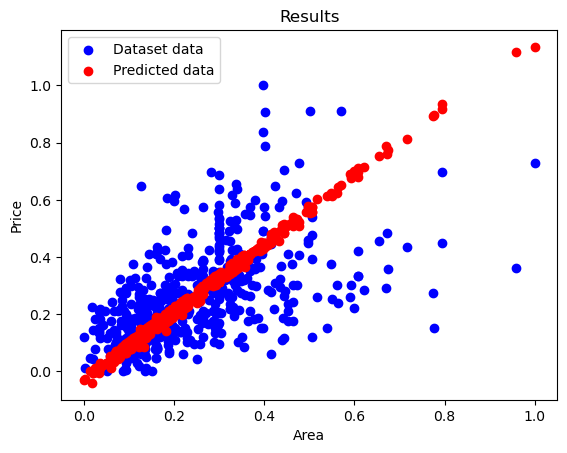

In [12]:
plt.scatter(X[:, 0], y, color='b', label='Dataset data')
plt.scatter(X[:, 0], linear_regression.predict(X), color='r', label='Predicted data')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Results')
plt.legend()
plt.show()

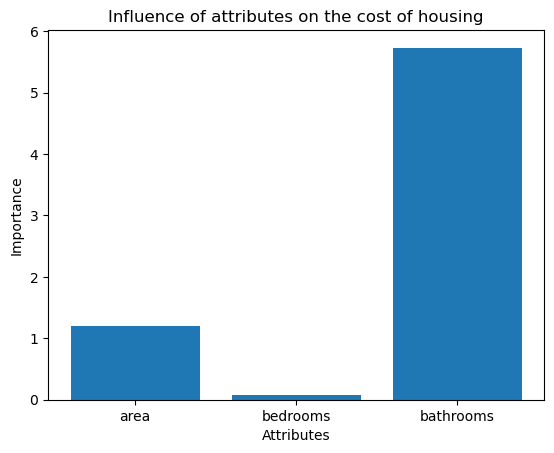

In [13]:
attributes = ['area', 'bedrooms', 'bathrooms']
influence = np.abs(linear_regression.w)
plt.bar(attributes, influence)
plt.xlabel('Attributes')
plt.ylabel('Importance')
plt.title('Influence of attributes on the cost of housing')
plt.show()

#### Find the same parameters using an analytical solution

Математичний вигляд Normal equation (аналітичного рішення) наступне: $$(\vec{w})^* = (X^TX)^{-1}X^T\vec{y}$$

In [14]:
analitical_w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(analitical_w.shape)
print(X.shape)
print(y.shape)
analitical_loss = cost(X, y.reshape(-1, 1), analitical_w)
print('The best analitical w: ', analitical_w.flatten())
print('The best analitical loss function: ', analitical_loss)

(3,)
(545, 3)
(545,)
The best analitical w:  [0.51550397 0.25511989 0.34191443]
The best analitical loss function:  0.02073607533747462


#### Compare the results

In [15]:
print('Results by using LinearRegression class:')
print(result)
print('-'*50)
print('Results by using analitical solution: ')
print(f"The best parameters w: {analitical_w}, loss:{analitical_loss}")

Results by using LinearRegression class:
The best parameters w: [1.1957634321117654, -0.07641936545742045, 5.729825751558018], loss:0.013944301005715282, found by 999 iterations
--------------------------------------------------
Results by using analitical solution: 
The best parameters w: [0.51550397 0.25511989 0.34191443], loss:0.02073607533747462


Conclusion: As we can see, in this case the losses using the LinearRegression class are less than when using the analytical solution.